In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

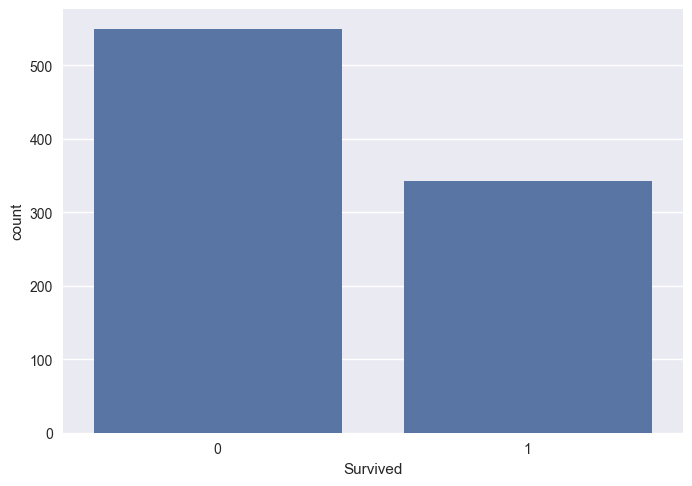

In [7]:
sns.countplot(data, x='Survived')

## 清洗数据集

*若是训练集测试集是分开的，可用data_all = [data_raw, data_val]合并一起清洗，后用for dataset in data_all*

In [11]:
data.isnull().sum() #查看空值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data.describe(include='all') #对数据集进行描述

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Saad, Mr. Amin",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**补足空缺值**

In [16]:
#用男女各平均值补足年龄（也用中位数fillna(data['Age'].median())）
gender_avg=data.groupby('Sex')['Age'].transform('mean')
data['Age'] = data['Age'].fillna(gender_avg)
data['Age'] = data['Age'].round(1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#补足Embarked
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])#mode()(按出现频率从高到低返回)

**删除一些字段**

In [21]:
drop_columns = ['PassengerId', 'Ticket', 'Cabin']
data.drop(drop_columns, axis=1, inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [23]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 特征构建

In [26]:
# (1) FamilySize = SibSp + Parch + 自己
data['FimilySize'] = data['SibSp'] + data['Parch'] + 1
# (2) Single
data['Single'] = data['FimilySize'].apply(lambda x: 0 if x>1 else 1)
# (3) 身份Title
data['Title'] = data['Name'].apply(lambda x: x.split(', ')[1]).apply(lambda x: x.split('.')[0])
# (4) 票价FareBin
data['FareBin'] = pd.cut(data['Fare'], 4) #根据票价分成四组
# (5) 年龄AgeBin
data['AgeBin'] = pd.cut(data['Age'], 4) #根据票价分成四组

In [28]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FimilySize,Single,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.512, 128.082]","(20.3, 40.2]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(-0.512, 128.082]","(20.3, 40.2]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(-0.512, 128.082]","(20.3, 40.2]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(-0.512, 128.082]","(20.3, 40.2]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(-0.512, 128.082]","(20.3, 40.2]"


In [30]:
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
Sir               1
Jonkheer          1
Ms                1
Capt              1
the Countess      1
Don               1
Mme               1
Name: Title, dtype: int64

In [32]:
# Title: 将人数少于10的全归于一类Other
title_counts = data['Title'].value_counts()
data['Title'] = data['Title'].apply(lambda x: 'Other' if title_counts[x] < 10 else x)

In [34]:
data['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [36]:
data['Survived'].groupby(data['Title']).mean()

Title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
Other     0.444444
Name: Survived, dtype: float64

**基于LabelEncoder构建新的字段**

In [39]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FimilySize,Single,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.512, 128.082]","(20.3, 40.2]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(-0.512, 128.082]","(20.3, 40.2]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(-0.512, 128.082]","(20.3, 40.2]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(-0.512, 128.082]","(20.3, 40.2]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(-0.512, 128.082]","(20.3, 40.2]"


In [41]:
label = LabelEncoder()
cols = ['Sex', 'Embarked', 'Title', 'FareBin', 'AgeBin']
for col in cols:
    data[col+'Code'] = label.fit_transform(data[col])

In [43]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FimilySize,Single,Title,FareBin,AgeBin,SexCode,EmbarkedCode,TitleCode,FareBinCode,AgeBinCode
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.512, 128.082]","(20.3, 40.2]",1,2,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(-0.512, 128.082]","(20.3, 40.2]",0,0,3,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(-0.512, 128.082]","(20.3, 40.2]",0,2,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(-0.512, 128.082]","(20.3, 40.2]",0,2,3,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(-0.512, 128.082]","(20.3, 40.2]",1,2,2,0,1


In [45]:
# cols_dummy = ['Sex', 'Embarked', 'Title', 'FareBinCode', 'AgeBinCode']
# for col in cols_dummy:
#     dummies = pd.get_dummies(data[col], prefix=col, drop_first=True) #drop_first为删除第一个ti
#     data = pd.concat([data, dummies], axis=1)

## 训练集测试集构建

In [45]:
data.columns.tolist()

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'FimilySize',
 'Single',
 'Title',
 'FareBin',
 'AgeBin',
 'SexCode',
 'EmbarkedCode',
 'TitleCode',
 'FareBinCode',
 'AgeBinCode']

In [49]:
X = data[['Pclass','SibSp','Parch','SexCode', 'EmbarkedCode', 'TitleCode', 'FareBinCode', 'AgeBinCode']]
Y = data['Survived']

#对标签进行编码
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=84)

## 模型训练

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #决策树分类器
from sklearn.neighbors import KNeighborsClassifier #K近邻分类器

In [54]:
LRmodel = LogisticRegression()

LRmodel.fit(train_X, train_y)

LogisticRegression()

In [73]:
DTmodel = DecisionTreeClassifier()

DTmodel.fit(train_X, train_y)

DecisionTreeClassifier()

In [75]:
KNmodel = KNeighborsClassifier(algorithm='auto',
                               leaf_size=6,
                               metric='minkowski',
                               metric_params=None,
                               n_jobs=None,
                               n_neighbors=9,
                               p=1,
                               weights='uniform')

KNmodel.fit(train_X, train_y)

KNeighborsClassifier(leaf_size=6, n_neighbors=9, p=1)

## 模型评估

In [56]:
from sklearn import metrics

In [77]:
pre_LR = LRmodel.predict(test_X)
acc_LR = metrics.accuracy_score(pre_LR, test_y)

pre_DT = DTmodel.predict(test_X)
acc_DT = metrics.accuracy_score(pre_DT, test_y)

pre_KN = KNmodel.predict(test_X)
acc_KN = metrics.accuracy_score(pre_KN, test_y)

print(f'The acc of LogisticRegression is {acc_LR}')
print(f'The acc of DecisionTreeClassifier is {acc_DT}')
print(f'The acc of KNeighborsClassifier is {acc_KN}')

The acc of LogisticRegression is 0.7541899441340782
The acc of DecisionTreeClassifier is 0.776536312849162
The acc of KNeighborsClassifier is 0.8100558659217877
